## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

In [2]:
import seaborn as sns

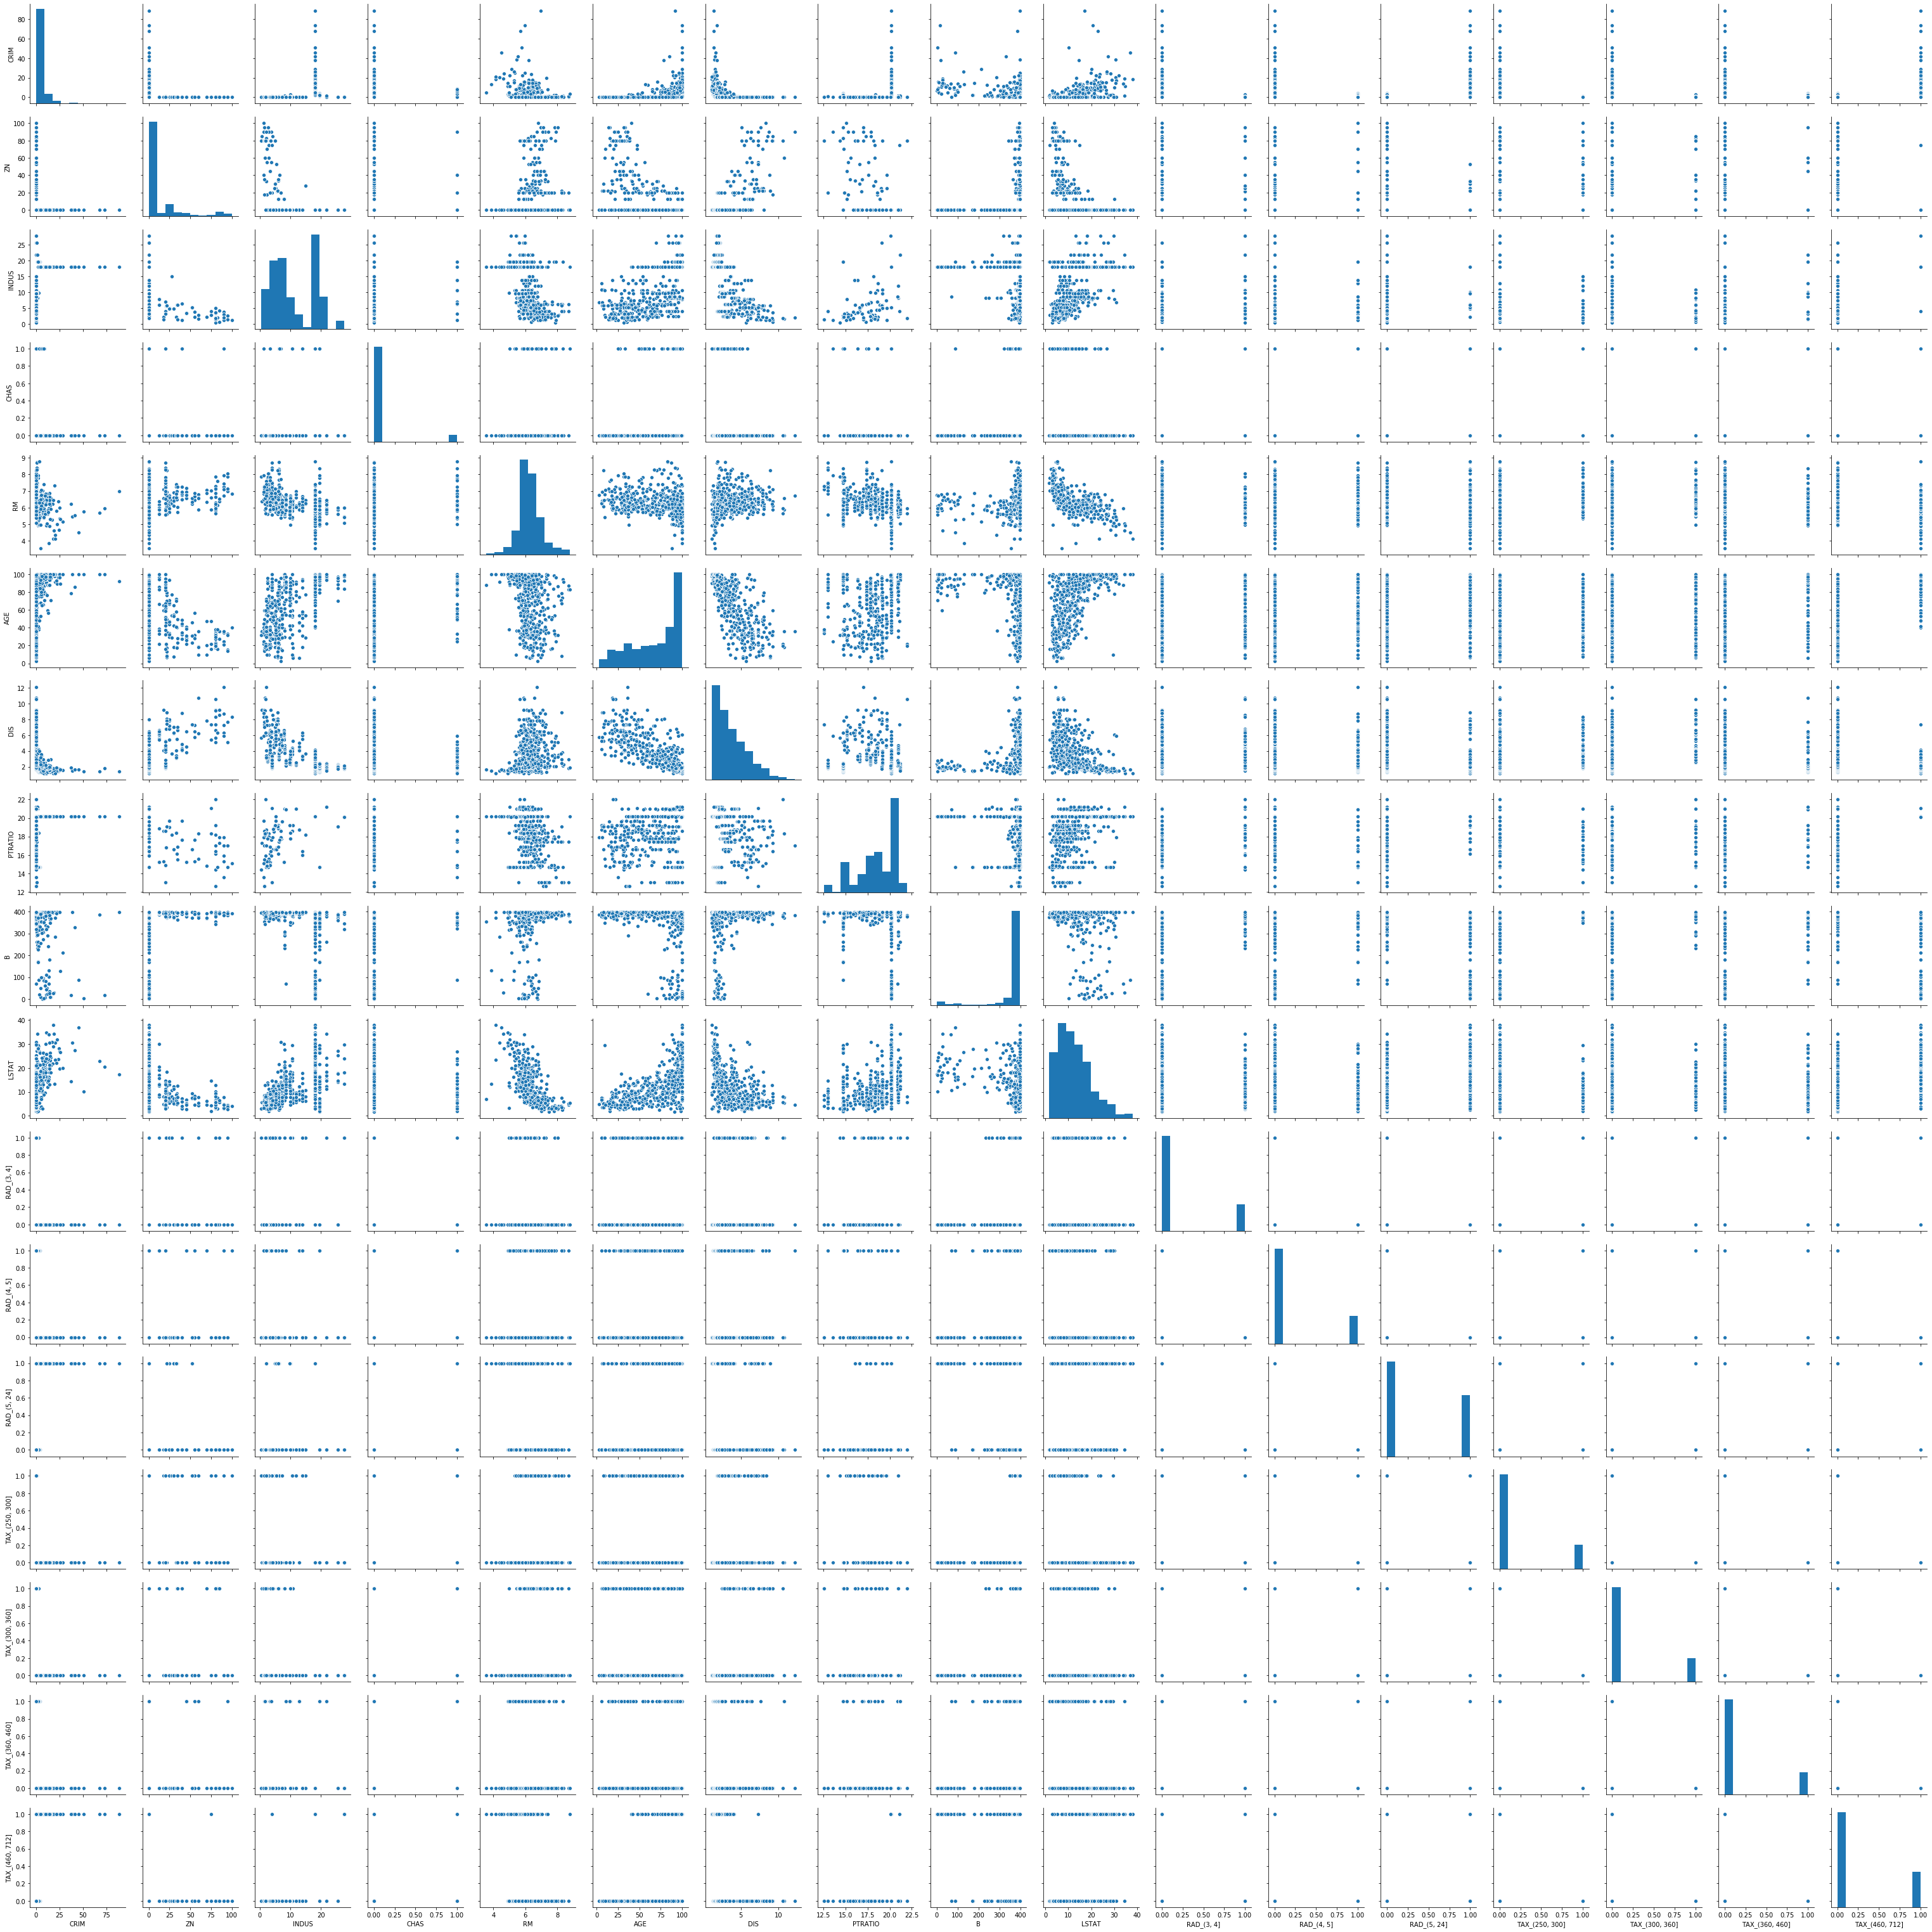

In [3]:
sns.pairplot(boston_features)

In [4]:
boston_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT', 'RAD_(3, 4]', 'RAD_(4, 5]', 'RAD_(5, 24]', 'TAX_(250, 300]',
       'TAX_(300, 360]', 'TAX_(360, 460]', 'TAX_(460, 712]'],
      dtype='object')

In [5]:
boston_features.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,6.284634,68.574901,3.795043,18.455534,356.674032,12.653063,0.217391,0.227273,0.393281,0.203557,0.199605,0.187747,0.272727
std,8.601545,23.322453,6.860353,0.253994,0.702617,28.148861,2.105710,2.164946,91.294864,7.141062,0.412879,0.419485,0.488962,0.403042,0.400099,0.390896,0.445803
min,0.006320,0.000000,0.460000,0.000000,3.561000,2.900000,1.129600,12.600000,0.320000,1.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,5.885500,45.025000,2.100175,17.400000,375.377500,6.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,6.208500,77.500000,3.207450,19.050000,391.440000,11.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,6.623500,94.075000,5.188425,20.200000,396.225000,16.955000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,12.126500,22.000000,396.900000,37.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df = boston_features
boston_cont = df[df.columns.drop(list(df.filter(regex='TAX')))]
boston_cont = boston_cont[boston_cont.columns.drop(list(boston_cont.filter(regex='RAD')))]
boston_cont = boston_cont.drop(['CHAS'], axis=1)

In [7]:
boston_cont.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,18.7,396.90,5.33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002265A863288>,
      dtype=object)

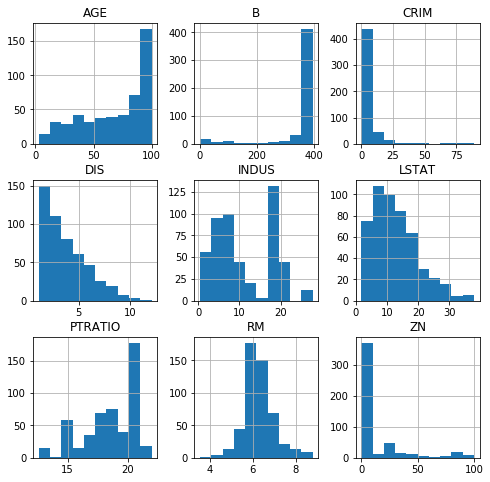

In [8]:
boston_cont.hist(figsize=[8,8])

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002265B5205C8>,
      dtype=object)

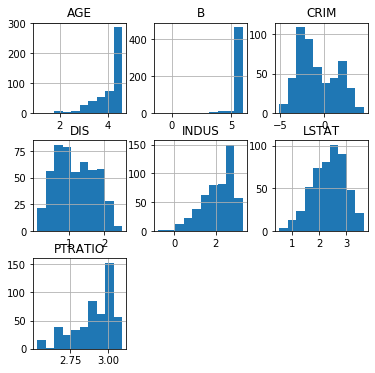

In [9]:
import numpy as np
data_log = pd.DataFrame([])
data_log['AGE'] = np.log(boston_cont['AGE'])
data_log['B'] = np.log(boston_cont['B'])
data_log['CRIM'] = np.log(boston_cont['CRIM'])
data_log['DIS'] = np.log(boston_cont['DIS'])
data_log['INDUS'] = np.log(boston_cont['INDUS'])
data_log['LSTAT'] = np.log(boston_cont['LSTAT'])
data_log['PTRATIO'] = np.log(boston_cont['PTRATIO'])
data_log.hist(figsize=[6,6])

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [10]:
data_log['ZN'] = np.log(boston_cont['ZN'])
boston_cont['ZN'].describe()

C:\Users\morga\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002265BC9F988>,
      dtype=object)

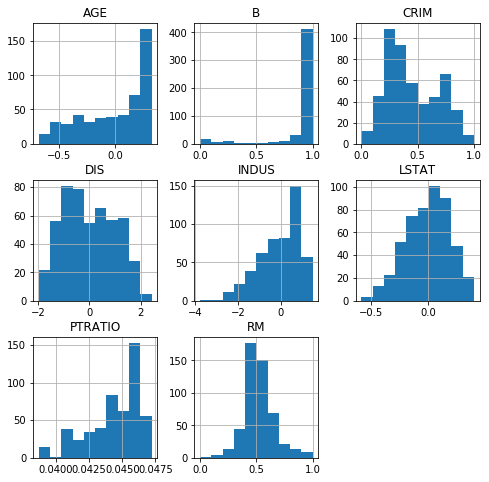

In [11]:
age = boston_cont['AGE']
b = boston_cont['B']
rm = boston_cont['RM']
logcrim = data_log['CRIM']
logdis = data_log['DIS']
logindus = data_log['INDUS']
loglstat = data_log['LSTAT']
logptratio = data_log['PTRATIO']

features_final = pd.DataFrame([])

features_final['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final['B'] = (b-min(b))/(max(b)-min(b))
features_final['RM'] = (rm-min(rm))/(max(rm)-min(rm))
features_final['DIS'] = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
features_final['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
features_final['LSTAT'] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
features_final['AGE'] = (age-np.mean(age))/(max(age)-min(age))
features_final['PTRATIO'] = (logptratio)/(np.linalg.norm(logptratio))

features_final.hist(figsize=[8,8])

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!